# Coursework 1 - Decision Trees Learning

### Enter your candidate number here: 700041488

## Summary
In this coursework, your task is to develop a machine learning classifier for predicting female patients that at high risk of Diabetes. Your model is to support clinicians in identifying patients who are likely to have “Diabetes”. The dataset has 9 attributes in total including the “target/label” attribute. The full dataset is available on ELE under assessment coursework 1. The dataset consists of the following: 


## Dataset

1. preg: Number of times pregnant
2. plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres: Diastolic blood pressure (mm Hg)
4. skin: Triceps skin fold thickness (mm)
5. insu: 2-Hour serum insulin (mu U/ml)
6. mass: Body mass index (weight in kg/(height in m)^2)
7. pedi: Diabetes pedigree function
8. age: Age (years)
9. class: Class variable (0 or 1)

In [529]:
import pandas as pd
import os

pd.set_option('mode.chained_assignment', None)    
dia_all = pd.read_csv("diabetes.txt") # This loads the full dataset # In the file, attributes are separated by ,

In [530]:
dia_all.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


## Seperate the inpout (attributes) from target (label)

In [531]:
from sklearn.utils import shuffle
dia_all = shuffle(dia_all)
sourcevars = dia_all.iloc[:,:-1].astype(float) #all rows + all columns except the last one
targetvar = dia_all.iloc[:,-1:] #all rows + only the last column
targetvar['class'] = targetvar['class'].apply(lambda x: 1 if x == 'tested_positive' else 0)

# Your answers
Please clearly highlight each task.

   ## Taks 1.a [Data Processing and Cleaning]

$Helper \thinspace Functions$

In [532]:
def calculate_stats(df, col_name):
    '''
        Returns array of mean and mode of given column
        Arguments:
        df -- pandas dataframe
        col_name -- valid column name of dataframe
    '''
    try:
        mean = df[col_name].mean()
        mode = df[col_name].mode()
    except Exception as err:
        print('Column not found: %s'%col_name)
    mm_array = [mean,mode]
    return mm_array

$Zero \thinspace Replacement$

In [533]:
df = pd.DataFrame()
for col in sourcevars.columns:
    sourcevars[col] = sourcevars[col].mask(sourcevars[col] == 0,calculate_stats(sourcevars, col)[0])

In [534]:
# for col in sourcevars.columns:
#     sourcevars[col] = (sourcevars[col]-sourcevars[col].mean())/sourcevars[col].std()

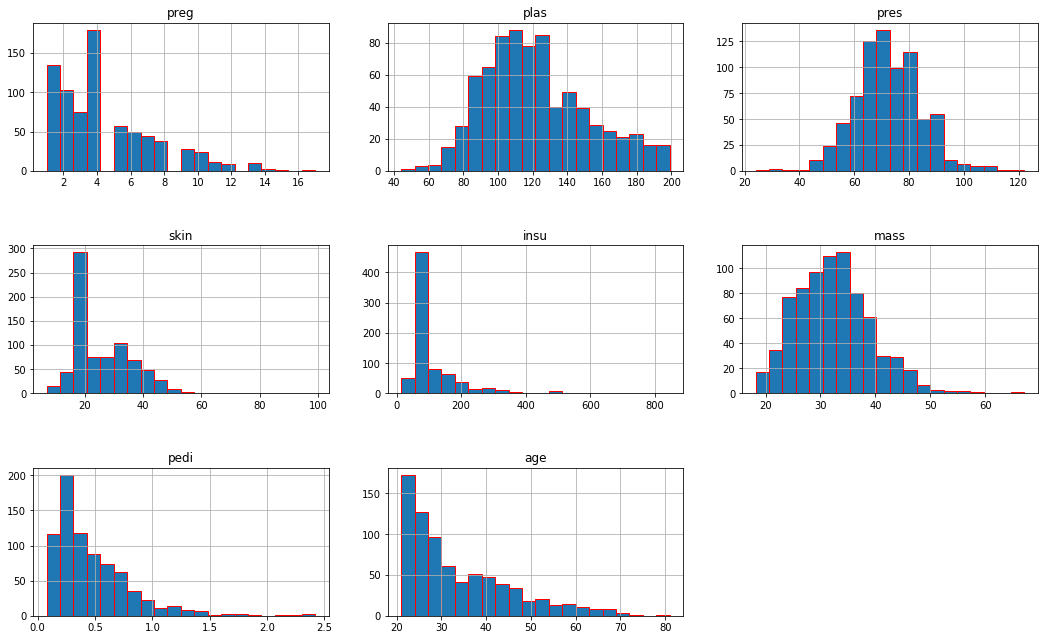

In [536]:
from matplotlib import pyplot as plt

columns = sourcevars.columns
fig = plt.figure(figsize=(18, 15))
length=len(columns)
for j,col in enumerate(columns):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sourcevars[col].hist(bins=20, edgecolor='red')
    plt.title(col)

   ## Task 1.b [Check Correlation and Class Distribution]

In [537]:
from IPython.display import HTML, display

In [538]:
def plot_corr_matrix(data_frame, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        Correlation Matrix.
    """

    corr = data_frame.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

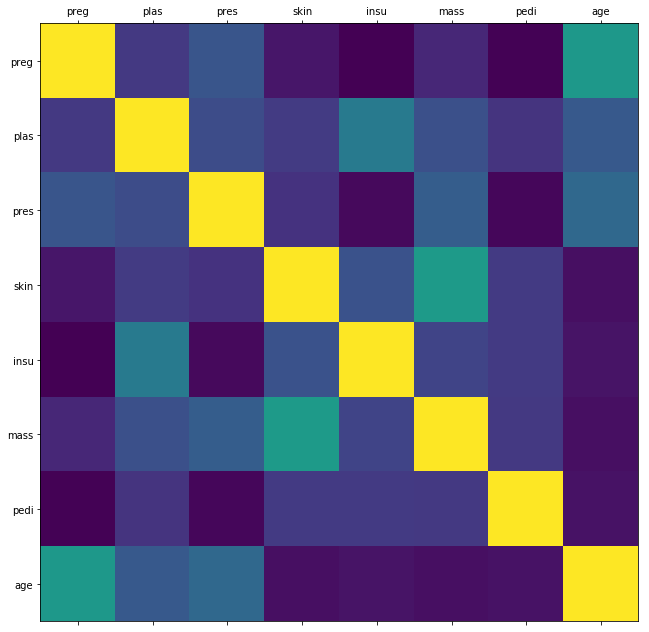

In [539]:
plot_corr_matrix(sourcevars)

In [540]:
display(HTML(sourcevars.corr().to_html()))

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.152568,0.253275,0.045776,-0.016738,0.097663,-0.010297,0.525261
plas,0.152568,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600
pres,0.253275,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740
skin,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423
insu,-0.016738,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652
mass,0.097663,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748
pedi,-0.010297,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561
age,0.525261,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000


$Check \thinspace for \thinspace distribution \thinspace of \thinspace true \thinspace and \thinspace false \thinspace cases$

In [541]:
num_obs = len(dia_all)
num_true = len(targetvar.loc[targetvar['class'] == 1])
num_false = len(targetvar.loc[targetvar['class'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print('_________________________________________________')
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  268 (34.90%)
_________________________________________________
Number of False cases: 500 (65.10%)


   ## Task 2.a [ Feature Selection]

In [542]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [543]:
split_test_size = 0.30
X = sourcevars

X_train, X_test, y_train, y_test = train_test_split(X,targetvar,test_size=split_test_size,random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Find optimum parameters using Grid Search technique

In [544]:
# Parameter evaluation
treeclf = DecisionTreeClassifier(random_state=42)
parameters = {'max_depth': [6, 7, 8, 9],
              'min_samples_split': [2, 3, 4, 5],
              'max_features': [1, 2, 3, 4]
}
gridsearch=GridSearchCV(treeclf, parameters, cv=100, scoring='roc_auc')
gridsearch.fit(X,targetvar)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'max_depth': 6, 'max_features': 2, 'min_samples_split': 5}
0.7848333333333332


In [545]:
tree = DecisionTreeClassifier(max_depth=6,max_features = 2, min_samples_split = 5, random_state=42)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.827
Accuracy on test set: 0.723


In [546]:
prediction_from_test_data = tree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)
print ("Accuracy of Decision Tree is: {0:0.4f}".format(accuracy))

Accuracy of Decision Tree is: 0.7229


In [547]:
print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

Confusion Matrix
[[ 40  32]
 [ 32 127]]


In [548]:
print ("Classification Report")
print('_________________________________________________________')
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report
_________________________________________________________
              precision    recall  f1-score   support

           1       0.56      0.56      0.56        72
           0       0.80      0.80      0.80       159

    accuracy                           0.72       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.72      0.72      0.72       231



## Task 2.d[Decision Tree Boundaries]

Write your answe here.

DecisionTree Feature ranking:
_________________________________________________
1. feature plas (0.460052)
2. feature preg (0.133303)
3. feature skin (0.106904)
4. feature mass (0.106179)
5. feature age (0.059807)
6. feature pres (0.051040)
7. feature pedi (0.044614)
8. feature insu (0.038100)
_________________________________________________


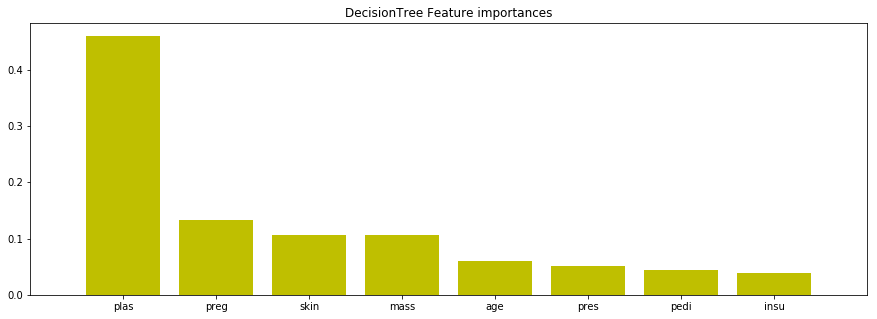

In [549]:
#Feature Importance DecisionTreeClassifier
importance = tree.feature_importances_
indices = np.argsort(importance)[::-1]
feature = X_train
feat_names = sourcevars.columns
print("DecisionTree Feature ranking:")
print('_________________________________________________')
for f in range(feature.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importance[indices[f]]))

print('_________________________________________________')
plt.figure(figsize=(15,5))
plt.title("DecisionTree Feature importances")
plt.bar(range(feature.shape[1]), importance[indices], color="y", align="center")
plt.xticks(range(feature.shape[1]), list(feat_names[indices]))
plt.xlim([-1, feature.shape[1]])
plt.show()

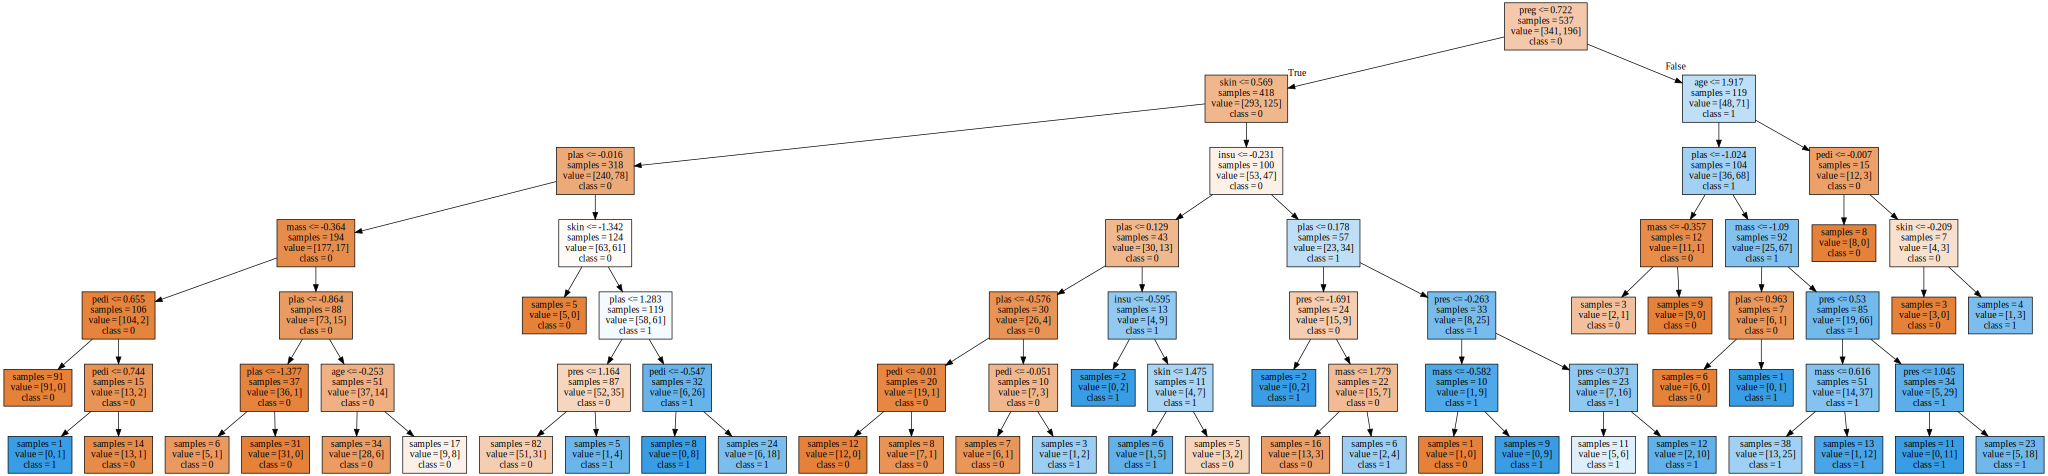

In [559]:
from sklearn.tree import export_graphviz
import graphviz

importance = tree.feature_importances_
indices = np.argsort(importance)[::-1]

export_graphviz(tree,out_file="diabetes_tree.dot",class_names=["0","1"],
feature_names=sourcevars.columns,impurity=False,filled=True)
with open("diabetes_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [551]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = tree.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('_________________________________________________')
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(metrics.roc_auc_score(y_test,y_pred),5)
print('_________________________________________________')
print ("Confusion Matrix")
print(cm)

TP - True Negative 127
FP - False Positive 32
FN - False Negative 32
TP - True Positive 40
_________________________________________________
Accuracy Rate: 0.7229437229437229
Misclassification Rate: 0.27705627705627706
_________________________________________________
Confusion Matrix
[[127  32]
 [ 32  40]]
